### Section 0.1: Install Libraries
Install required dependencies (no NLTK, spaCy, langdetect, textstat, or wordcloud).

In [ ]:
!pip install transformers sentencepiece sentence-transformers scikit-learn matplotlib pandas --quiet
print("✅ Libraries installed.")

✅ Libraries installed.


### Section 0.2: Import Libraries
Import necessary libraries.

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import textwrap
import re
import requests
import ssl
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Handle SSL for file downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

print("✅ Libraries imported.")

✅ Libraries imported.


### Section 0.3: Load Summarization Models
Load T5, BART, and PEGASUS for summarization.

In [ ]:
t5_tokenizer = T5Tokenizer.from_pretrained('t5-base')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-base')
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
pegasus_sum_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')
pegasus_sum_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')
print("✅ Summarization models loaded: T5, BART, PEGASUS.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

✅ Summarization models loaded: T5, BART, PEGASUS.


### Section 0.4: Load Paraphrasing Models
Load PEGASUS, T5-Paraphrase, and BART-Paraphrase.

In [ ]:
pegasus_para_tokenizer = PegasusTokenizer.from_pretrained('tuner007/pegasus_paraphrase')
pegasus_para_model = PegasusForConditionalGeneration.from_pretrained('tuner007/pegasus_paraphrase')
paraphrase_t5_tokenizer = T5Tokenizer.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_t5_model = T5ForConditionalGeneration.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_bart_tokenizer = BartTokenizer.from_pretrained('eugenesiow/bart-paraphrase')
paraphrase_bart_model = BartForConditionalGeneration.from_pretrained('eugenesiow/bart-paraphrase')
print("✅ Paraphrasing models loaded: PEGASUS, T5-Paraphrase, BART-Paraphrase.")

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/332 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

✅ Paraphrasing models loaded: PEGASUS, T5-Paraphrase, BART-Paraphrase.


### Section 0.5: Load Similarity Model
Load SentenceTransformer for similarity.

In [ ]:
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ Similarity model loaded.")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Similarity model loaded.


## Part 1: Text Input Processing
### Section 1.1: Load Single Text File
Load and clean a text file from a URL.

In [ ]:
def load_text_file(url):
    """Load and clean text from a URL."""
    try:
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        text = response.text
        # Clean Gutenberg headers/footers
        start_idx = max([text.find(marker) for marker in ["*** START OF", "CHAPTER"]] + [0])
        end_idx = text.find("*** END OF")
        if start_idx > 0 and end_idx > 0:
            text = text[start_idx:end_idx]
        if len(text) < 100:
            raise ValueError("Text is too short.")
        return text.strip(), "Text file"
    except Exception as e:
        print(f"Error loading text from {url}: {e}")
        fallback = """Natural Language Processing enables computers to understand human language."""
        return fallback, "Fallback text"

### Section 1.2: Validate Text Input
Validate text length and content.

In [ ]:
def validate_text(text):
    """Validate text input."""
    if not isinstance(text, str) or len(text.strip()) < 50:
        raise ValueError("Invalid text: must be a string with at least 50 characters.")
    return text

### Section 1.3: Load Multiple Text Files
Load two text files for processing.

In [ ]:
def load_multiple_text_files(urls):
    """Load multiple text files with validation."""
    if len(urls) != 2:
        raise ValueError("Exactly two URLs must be provided.")
    texts = {}
    for i, url in enumerate(urls, 1):
        text, source = load_text_file(url)
        text = validate_text(text)
        texts[f"Text {i}"] = {'text': text[:50000], 'source': source}  # Limit size
    return texts

### Section 1.4: Test Text Loading
Load and preview two Gutenberg texts.

In [ ]:
file_urls = [

    "https://www.gutenberg.org/files/84/84-0.txt",  # Frankenstein
    "https://www.gutenberg.org/files/1342/1342-0.txt"  # Pride and Prejudice
]
loaded_texts = load_multiple_text_files(file_urls)
for key, data in loaded_texts.items():
    print(f"{key} ({data['source']}): {len(data['text']):,} characters")
    print(f"Preview: {data['text'][:150]}...")

Text 1 (Text file): 50,000 characters
Preview: *** START OF THE PROJECT GUTENBERG EBOOK 84 ***

Frankenstein;

or, the Modern Prometheus

by Mary Wollstonecraft (Godwin) Shelley


 CONTENTS

 Lette...
Text 2 (Text file): 50,000 characters
Preview: CHAPTER II.


[Illustration]

Mr. Bennet was among the earliest of those who waited on Mr. Bingley. He
had always intended to visit him, though ...


## Part 2: Core Analysis Components
### Section 2.1: T5 Summarization
Summarize text using T5.

In [ ]:
def generate_t5_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with T5."""
    input_text = "summarize: " + text.strip().replace("\n", " ")
    inputs = t5_tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = t5_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
def clean_text(text):
    """Remove special characters and normalize whitespace."""
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

### Section 2.2: BART Summarization
Summarize text using BART.

In [ ]:
def generate_bart_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with BART."""
    inputs = bart_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = bart_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

### Section 2.3: PEGASUS Summarization
Summarize text using PEGASUS.

In [ ]:
def generate_pegasus_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with PEGASUS."""
    # Clean and truncate input to prevent tokenization issues
    text = clean_text(text[:1500])  # Stricter truncation to 1500 chars
    try:
        inputs = pegasus_sum_tokenizer.encode(
            text,
            return_tensors='pt',
            max_length=512,  # Reduced max_length for safety
            truncation=True,
            padding='max_length'  # Ensure consistent input size
        )
        # Validate token IDs
        if inputs.max().item() >= pegasus_sum_tokenizer.vocab_size:
            raise ValueError(f"Token ID {inputs.max().item()} exceeds vocab size {pegasus_sum_tokenizer.vocab_size}.")
        summary_ids = pegasus_sum_model.generate(
            inputs,
            max_length=max_len,
            min_length=min_len,
            num_beams=beams,
            no_repeat_ngram_size=3,
            length_penalty=2.0,
            early_stopping=True
        )
        return pegasus_sum_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    except Exception as e:
        print(f"PEGASUS summarization failed: {e}")
        return "Summary unavailable due to processing error."

### Section 2.4: PEGASUS Paraphrasing
Generate paraphrases using PEGASUS.

In [ ]:
def generate_pegasus_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with PEGASUS."""
    inputs = pegasus_para_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = pegasus_para_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return pegasus_para_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

### Section 2.5: T5 Paraphrasing
Generate paraphrases using T5-Paraphrase.

In [ ]:
def generate_t5_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with T5-Paraphrase."""
    input_text = f"paraphrase: {text} </s>"
    inputs = paraphrase_t5_tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    paraphrase_ids = paraphrase_t5_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_t5_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

### Section 2.6: BART Paraphrasing
Generate paraphrases using BART-Paraphrase.

In [ ]:
def generate_bart_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with BART-Paraphrase."""
    inputs = paraphrase_bart_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = paraphrase_bart_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_bart_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

### Section 2.7: Similarity Analysis
Compute semantic similarity.

In [ ]:
def compute_similarity(text1, text2):
    """Compute cosine similarity between texts."""
    embeddings = similarity_model.encode([text1, text2])
    return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

## Part 3: Enhanced Model Comparison
### Section 3.1: Summary Length Analysis
Compute summary length.

In [ ]:
def analyze_summary_length(summary):
    """Compute word count of summary."""
    return len(summary.split())  # Simple split instead of NLTK tokenization

### Section 3.2: Similarity to Original
Compute similarity to original text.

In [ ]:
def similarity_to_original(summary, original_text):
    """Compute similarity between summary and original."""
    return compute_similarity(summary, original_text[:2000])

### Section 3.3: Enhanced Summarization Comparison
Compare T5, BART, and PEGASUS for summarization.

In [ ]:
def compare_summarizers_enhanced(text, min_len=40, max_len=150, beams=4):
    """Enhanced comparison of T5, BART, and PEGASUS for summarization."""
    t5_sum = generate_t5_summary(text[:2000], min_len, max_len, beams)
    bart_sum = generate_bart_summary(text[:2000], min_len, max_len, beams)
    pegasus_sum = generate_pegasus_summary(text[:2000], min_len, max_len, beams)

    metrics = {
        't5': {
            'summary': t5_sum,
            'length': analyze_summary_length(t5_sum),
            'sim_to_original': similarity_to_original(t5_sum, text)
        },
        'bart': {
            'summary': bart_sum,
            'length': analyze_summary_length(bart_sum),
            'sim_to_original': similarity_to_original(bart_sum, text)
        },
        'pegasus': {
            'summary': pegasus_sum,
            'length': analyze_summary_length(pegasus_sum),
            'sim_to_original': similarity_to_original(pegasus_sum, text)
        },
        'sim_t5_bart': compute_similarity(t5_sum, bart_sum),
        'sim_t5_pegasus': compute_similarity(t5_sum, pegasus_sum),
        'sim_bart_pegasus': compute_similarity(bart_sum, pegasus_sum)
    }

    print("----------- Enhanced Summarization Comparison -----------")
    print(f"T5 Summary (Length: {metrics['t5']['length']}, Sim to Original: {metrics['t5']['sim_to_original']:.3f}):")
    print(textwrap.fill(t5_sum, width=100))
    print(f"\nBART Summary (Length: {metrics['bart']['length']}, Sim to Original: {metrics['bart']['sim_to_original']:.3f}):")
    print(textwrap.fill(bart_sum, width=100))
    print(f"\nPEGASUS Summary (Length: {metrics['pegasus']['length']}, Sim to Original: {metrics['pegasus']['sim_to_original']:.3f}):")
    print(textwrap.fill(pegasus_sum, width=100))
    print(f"\nSimilarity T5 vs BART: {metrics['sim_t5_bart']:.3f}")
    print(f"Similarity T5 vs PEGASUS: {metrics['sim_t5_pegasus']:.3f}")
    print(f"Similarity BART vs PEGASUS: {metrics['sim_bart_pegasus']:.3f}")

    return metrics

### Section 3.4: Enhanced Paraphrasing Comparison
Compare PEGASUS, T5-Paraphrase, and BART-Paraphrase.

In [ ]:
def compare_paraphrasers_enhanced(text, num_return=3, beams=10):
    """Enhanced comparison of PEGASUS, T5-Paraphrase, and BART-Paraphrase."""
    peg_paras = generate_pegasus_paraphrase(text, num_return, beams)
    t5_paras = generate_t5_paraphrase(text, num_return, beams)
    bart_paras = generate_bart_paraphrase(text, num_return, beams)

    metrics = {
        'pegasus': {
            'paraphrases': peg_paras,
            'avg_length': sum(len(p.split()) for p in peg_paras) / len(peg_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in peg_paras) / len(peg_paras)
        },
        't5_paraphrase': {
            'paraphrases': t5_paras,
            'avg_length': sum(len(p.split()) for p in t5_paras) / len(t5_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in t5_paras) / len(t5_paras)
        },
        'bart_paraphrase': {
            'paraphrases': bart_paras,
            'avg_length': sum(len(p.split()) for p in bart_paras) / len(bart_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in bart_paras) / len(bart_paras)
        },
        'avg_sim_peg_t5': sum(compute_similarity(peg_paras[i], t5_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_peg_bart': sum(compute_similarity(peg_paras[i], bart_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_t5_bart': sum(compute_similarity(t5_paras[i], bart_paras[i]) for i in range(num_return)) / num_return
    }

    print("----------- Enhanced Paraphrasing Comparison -----------")
    print(f"PEGASUS Paraphrases (Avg Length: {metrics['pegasus']['avg_length']:.1f}, Avg Sim to Original: {metrics['pegasus']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(peg_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nT5-Paraphrase Paraphrases (Avg Length: {metrics['t5_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['t5_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(t5_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nBART-Paraphrase Paraphrases (Avg Length: {metrics['bart_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['bart_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(bart_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nAverage Similarity PEGASUS vs T5-Paraphrase: {metrics['avg_sim_peg_t5']:.3f}")
    print(f"Average Similarity PEGASUS vs BART-Paraphrase: {metrics['avg_sim_peg_bart']:.3f}")
    print(f"Average Similarity T5-Paraphrase vs BART-Paraphrase: {metrics['avg_sim_t5_bart']:.3f}")

    return metrics

## Part 4: Integrated TextMorph Pipeline
### Section 4.1: Pipeline Initialization
Initialize the pipeline class.

In [ ]:
class TextMorphPipeline:
    """Streamlined TextMorph pipeline for text files, no preprocessing or NLP."""

    def __init__(self):
        self.reference_texts = []

    def add_reference(self, text):
        """Add reference text for similarity."""
        self.reference_texts.append(text)

### Section 4.2: Pipeline Summarization Step
Summarize in pipeline.

In [ ]:
def pipeline_summarize(self, input_text, summarizer='t5'):
    """Summarization step in pipeline."""
    if summarizer == 't5':
        summary = generate_t5_summary(input_text)
    elif summarizer == 'bart':
        summary = generate_bart_summary(input_text)
    elif summarizer == 'pegasus':
        summary = generate_pegasus_summary(input_text)
    else:
        raise ValueError("Invalid summarizer. Choose 't5', 'bart', or 'pegasus'.")
    return summary, summarizer

### Section 4.3: Pipeline Paraphrasing Step
Paraphrase in pipeline with comparison.

In [ ]:
def pipeline_paraphrase(self, input_text, paraphrase_sentences=2):
    """Paraphrasing step with comparison."""
    # Simple sentence splitting without NLTK
    sentences = re.split(r'[.!?]+', input_text)[:paraphrase_sentences]
    sentences = [s.strip() for s in sentences if s.strip()]
    paraphrases = {}
    for i, sent in enumerate(sentences):
        key = f'Sentence {i+1}'
        metrics = compare_paraphrasers_enhanced(sent)
        paraphrases[key] = {'original': sent[:100] + "...", 'metrics': metrics}
    return paraphrases

### Section 4.4: Pipeline Similarity Step
Compute similarity in pipeline.

In [ ]:
def pipeline_similarity(self, input_text, top_k_similar=2):
    """Similarity step in pipeline."""
    if self.reference_texts:
        similarities = [(i+1, compute_similarity(input_text[:2000], ref)) for i, ref in enumerate(self.reference_texts)]
        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:top_k_similar]
    return []

### Section 4.5: Full Pipeline Process
Run the full pipeline.

In [ ]:
def process(self, input_text, summarizer='t5', paraphrase_sentences=2, top_k_similar=2):
    """Run the full pipeline."""
    results = {}

    summary, used_summarizer = pipeline_summarize(self, input_text, summarizer)
    results['summary'] = summary
    results['summarizer_used'] = used_summarizer

    results['paraphrases'] = pipeline_paraphrase(self, input_text, paraphrase_sentences)

    results['similarities'] = pipeline_similarity(self, input_text, top_k_similar)

    return results

# Bind methods to class
TextMorphPipeline.pipeline_summarize = pipeline_summarize
TextMorphPipeline.pipeline_paraphrase = pipeline_paraphrase
TextMorphPipeline.pipeline_similarity = pipeline_similarity
TextMorphPipeline.process = process

# Initialize
pipeline = TextMorphPipeline()

## Part 5: Testing with Text Files
### Section 5.1: Add Reference Texts
Add references for similarity.

In [ ]:
pipeline.add_reference("Natural Language Processing powers modern AI applications.")
pipeline.add_reference("Machine learning enhances text analysis capabilities.")
print("✅ Reference texts added.")

✅ Reference texts added.


### Section 5.2: Process First Text (T5)
Run pipeline with T5 on first text.

In [ ]:
first_text = loaded_texts['Text 1']['text']
results_t5_first = pipeline.process(first_text, summarizer='t5')
print("----------- T5 on First Text (Frankenstein) -----------")
print(f"Summary: {textwrap.fill(results_t5_first['summary'], width=100)}")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 25.3, Avg Sim to Original: 0.514):
  1. Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 5 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter
  2. Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 5 Chapter 7 Chapter 8 Chapter 9 Chapter 10
  3. Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter

T5-Paraphrase Paraphrases (Avg Length: 32.0, Avg Sim to Original: 0.944):
  1. *** START OF THE PROJECT GUTENBERG EBOOK 84 *** Frankenstein; or, the Modern Prometheus by Mary Wollstonecraft (Godwin) Shelley CONTENTS Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter
  2. *** START OF THE PROJECT GUTENBERG EBOOK 84 *** Frankenstein or the Modern Prometheus by Mary Wollstonecraft (Godwin) Shelley CONTENTS Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter
  3. ***

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 2.7, Avg Sim to Original: 0.959):
  1. Saville, England.
  2. Saville is in England.
  3. Saville, England

T5-Paraphrase Paraphrases (Avg Length: 2.7, Avg Sim to Original: 0.983):
  1. Saville, England
  2. Saville ( England )
  3. Saville, England.

BART-Paraphrase Paraphrases (Avg Length: 2.7, Avg Sim to Original: 0.930):
  1. Saville, England
  2. Scotland Saville, England
  3. In Saville, England

Average Similarity PEGASUS vs T5-Paraphrase: 0.956
Average Similarity PEGASUS vs BART-Paraphrase: 0.891
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.918
----------- T5 on First Text (Frankenstein) -----------
Summary: the author's first task is to assure her sister of her welfare and increasing confidence in the
success of her undertaking . she will satiate her curiosity with the sight of a part of the world
never before visited, and may tread a land never before imprinted by man .


### Section 5.3: Process Second Text (PEGASUS)
Run pipeline with PEGASUS on second text.

In [ ]:
second_text = loaded_texts['Text 2']['text']
results_pegasus_second = pipeline.process(second_text, summarizer='pegasus')
print("----------- PEGASUS on Second Text (Pride and Prejudice) -----------")
print(f"Summary: {textwrap.fill(results_pegasus_second['summary'], width=100)}")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 2.0, Avg Sim to Original: 0.931):
  1. Chapter 2.
  2. CHAPTER 2.
  3. CHAPTER II.

T5-Paraphrase Paraphrases (Avg Length: 2.0, Avg Sim to Original: 0.594):
  1. CHAPTER II
  2. CHAPITRE II
  3. CHAPTTER II

BART-Paraphrase Paraphrases (Avg Length: 2.3, Avg Sim to Original: 0.942):
  1. CHAPTER II
  2. CHAPTER 2
  3. CHAPTER _ II

Average Similarity PEGASUS vs T5-Paraphrase: 0.541
Average Similarity PEGASUS vs BART-Paraphrase: 0.901
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.583


/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 3.7, Avg Sim to Original: 0.754):
  1. Mr.
  2. The illustration is by Mr.
  3. The illustration is of Mr.

T5-Paraphrase Paraphrases (Avg Length: 2.0, Avg Sim to Original: 0.973):
  1. [Illustration] Mr.
  2. Mr. [Illustration]
  3. [Illustration] Mr

BART-Paraphrase Paraphrases (Avg Length: 6.7, Avg Sim to Original: 0.679):
  1. [Illustration]
  2. [Illustration] What is the best way to describe Mr. Wiliams?
  3. [Illustration] What is the best way to describe Mr.

Average Similarity PEGASUS vs T5-Paraphrase: 0.777
Average Similarity PEGASUS vs BART-Paraphrase: 0.508
Average Similarity T5-Paraphrase vs BART-Paraphrase: 0.699
----------- PEGASUS on Second Text (Pride and Prejudice) -----------
Summary: One of the most memorable moments in the life of Elizabeth Bennet, the heroine of Shakespeare
sMeasure for Measure, came when she received a letter from her father, addressed to her sister,
Lizzy, 

### Section 5.4: Enhanced Comparison on Both Texts
Compare T5, BART, and PEGASUS on both texts.

In [ ]:
print("----------- Enhanced Summarization Comparison on First Text -----------")
comparison_first = compare_summarizers_enhanced(first_text)
print("----------- Enhanced Summarization Comparison on Second Text -----------")
comparison_second = compare_summarizers_enhanced(second_text)

----------- Enhanced Summarization Comparison on First Text -----------
----------- Enhanced Summarization Comparison -----------
T5 Summary (Length: 44, Sim to Original: 0.192):
cnn.com's ireport boot camp challenges readers to read a new book . the author asks readers to share
their thoughts on the book with the rest of us . a book about a man's life is out now, and he's
ready to go .

BART Summary (Length: 85, Sim to Original: 0.515):
*** START OF THE PROJECT GUTENBERG EBOOK 84 *** exting exting extingacebookFrankenstein; exting
extingescriptionHegemony Chapter 14, the New Prometheus; extingacebookor, the Modern Prometheus
extingacebook subur subur suburby Mary Wollstonecraft (Godwin) Shelley extingacebookacebookescriptio
nescriptionescriptionFilenameFilenameFilenameescriptionFilenameescriptionescriptionategoryategoryate
goryFilenameFilenameategoryFilenameategoryategoryescriptionategoryescriptionescriptionTextColor
Letter 1 Palestin Letter 2 Palestin Letter 3 Palestin Letter 4 Pales

## Part 6: Visualization & Insights
### Section 6.1: Enhanced Summarization Metrics Plot
Visualize T5 vs BART vs PEGASUS metrics.

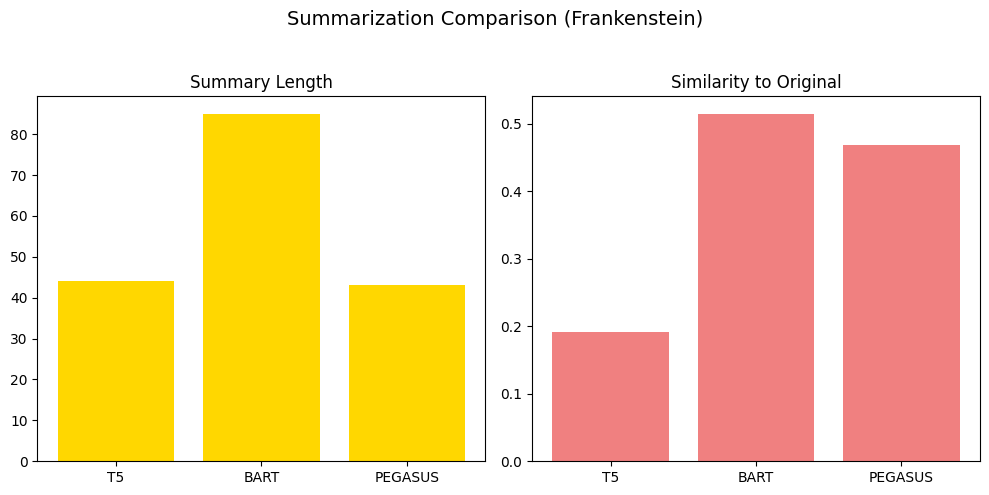

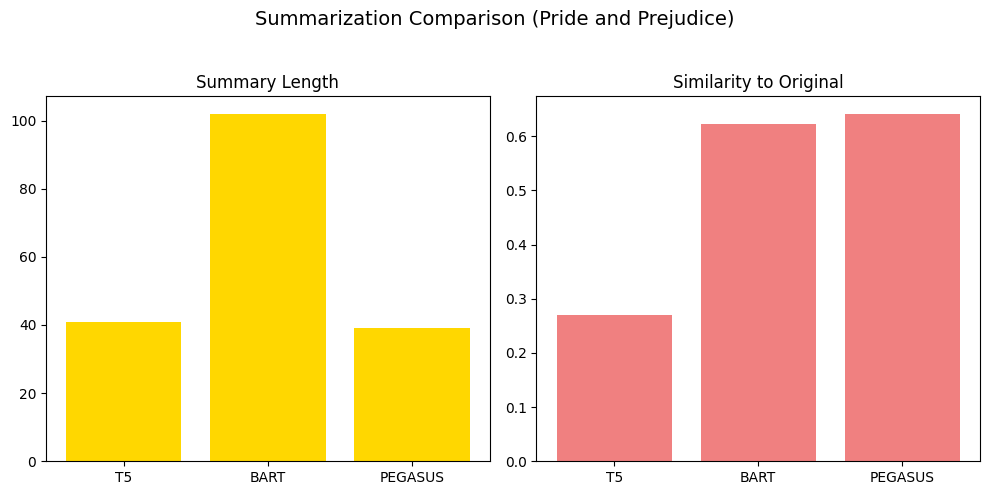

In [ ]:
def plot_enhanced_summarization_comparison(metrics, title="Summarization Comparison"):
    """Plot enhanced metrics for summarization models."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Length
    ax1.bar(['T5', 'BART', 'PEGASUS'],
            [metrics['t5']['length'], metrics['bart']['length'], metrics['pegasus']['length']],
            color='gold')
    ax1.set_title('Summary Length')

    # Similarity to Original
    ax2.bar(['T5', 'BART', 'PEGASUS'],
            [metrics['t5']['sim_to_original'],
             metrics['bart']['sim_to_original'],
             metrics['pegasus']['sim_to_original']],
            color='lightcoral')
    ax2.set_title('Similarity to Original')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_enhanced_summarization_comparison(comparison_first, title="Summarization Comparison (Frankenstein)")
plot_enhanced_summarization_comparison(comparison_second, title="Summarization Comparison (Pride and Prejudice)")

### Section 6.2: Enhanced Paraphrasing Metrics Plot
Visualize PEGASUS vs T5-Paraphrase vs BART-Paraphrase metrics.

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 25.3, Avg Sim to Original: 0.514):
  1. Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 5 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter
  2. Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 5 Chapter 7 Chapter 8 Chapter 9 Chapter 10
  3. Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter

T5-Paraphrase Paraphrases (Avg Length: 32.0, Avg Sim to Original: 0.944):
  1. *** START OF THE PROJECT GUTENBERG EBOOK 84 *** Frankenstein; or, the Modern Prometheus by Mary Wollstonecraft (Godwin) Shelley CONTENTS Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter
  2. *** START OF THE PROJECT GUTENBERG EBOOK 84 *** Frankenstein or the Modern Prometheus by Mary Wollstonecraft (Godwin) Shelley CONTENTS Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter
  3. ***

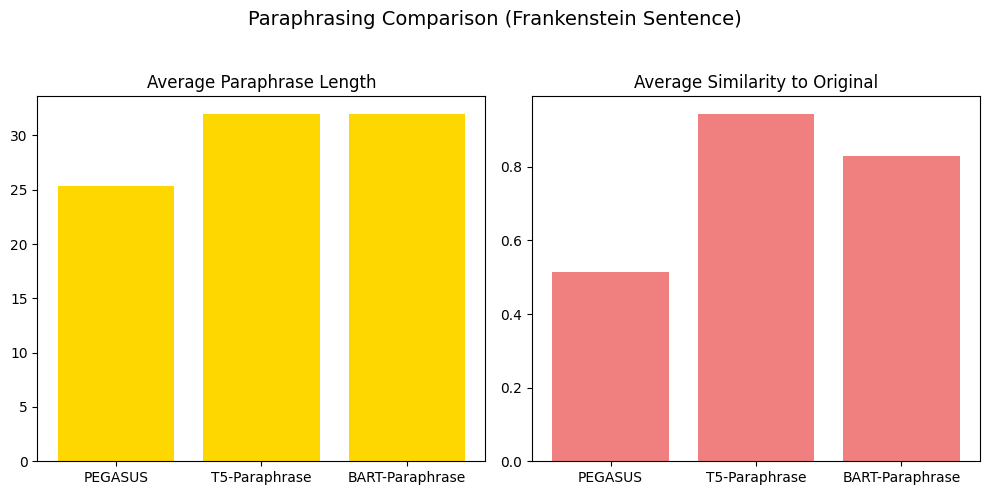

In [ ]:
def plot_enhanced_paraphrasing_comparison(metrics, title="Paraphrasing Comparison"):
    """Plot enhanced metrics for paraphrasing models."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Average Length
    ax1.bar(['PEGASUS', 'T5-Paraphrase', 'BART-Paraphrase'],
            [metrics['pegasus']['avg_length'],
             metrics['t5_paraphrase']['avg_length'],
             metrics['bart_paraphrase']['avg_length']],
            color='gold')
    ax1.set_title('Average Paraphrase Length')

    # Average Similarity to Original
    ax2.bar(['PEGASUS', 'T5-Paraphrase', 'BART-Paraphrase'],
            [metrics['pegasus']['avg_sim_to_original'],
             metrics['t5_paraphrase']['avg_sim_to_original'],
             metrics['bart_paraphrase']['avg_sim_to_original']],
            color='lightcoral')
    ax2.set_title('Average Similarity to Original')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot paraphrasing comparison for first sentence of first text
first_sentence = re.split(r'[.!?]+', first_text)[0].strip()
plot_enhanced_paraphrasing_comparison(compare_paraphrasers_enhanced(first_sentence),
                                     title="Paraphrasing Comparison (Frankenstein Sentence)")

## Section 7.1:Bigram Analysis
Add bigram analysis using simple string splitting.

In [ ]:
def analyze_bigrams(text):
    """Compute top bigrams using string splitting."""
    text = clean_text(text[:2000])  # Clean and limit for performance
    words = text.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    bigram_freq = Counter(bigrams).most_common(5)
    return [(f"{w1} {w2}", count) for (w1, w2), count in bigram_freq]

print("\nBigram Analysis")
for key, data in loaded_texts.items():
    print(f"\n{key}:")
    bigrams = analyze_bigrams(data['text'])
    print(f"Top Bigrams: {bigrams}")


Bigram Analysis

Text 1:
Top Bigrams: [('Letter 1', 2), ('4 Chapter', 2), ('of my', 2), ('in the', 2), ('I am', 2)]

Text 2:
Top Bigrams: [('Mr. Bingley', 3), ('Mrs. Long', 3), ('do not', 3), ('till the', 2), ('are not', 2)]


### Section 7.2: Bigram Visualization
Visualize bigram frequencies.

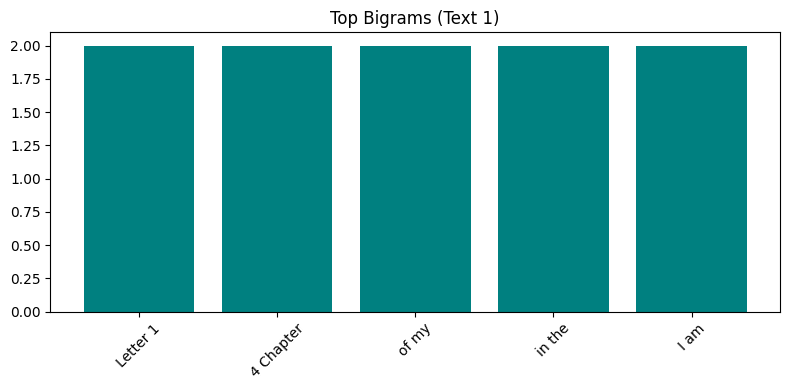

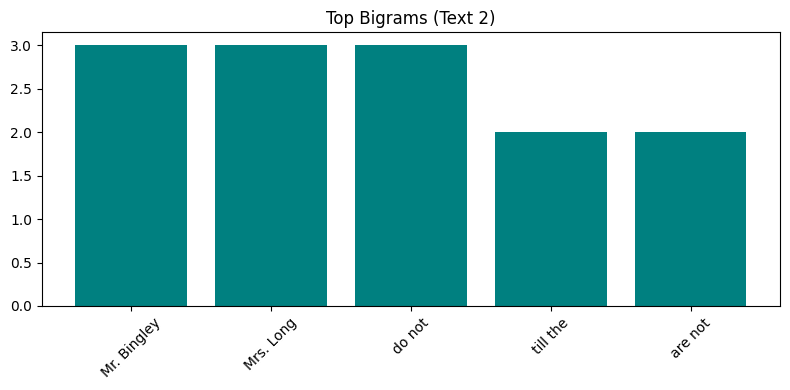

In [ ]:
def plot_bigrams(bigrams, title="Top Bigrams"):
    """Plot top bigrams."""
    if bigrams:
        labels, counts = zip(*bigrams)
        plt.figure(figsize=(8, 4))
        plt.bar(labels, counts, color='teal')
        plt.title(title, fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

for key, data in loaded_texts.items():
    bigrams = analyze_bigrams(data['text'])
    plot_bigrams(bigrams, title=f"Top Bigrams ({key})")